In [7]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from datetime import datetime

In [16]:
from src.utils import convierte_a_minusculas

In [17]:
pd.set_option('display.max_rows', 200)

In [2]:
#### Asisting configuration
sys.path.append("..")

In [127]:
df = pd.read_csv("../data/ds_challenge_apr2021.csv")

In [122]:
colores = ['#99C935','#EDAD08','#38A6A5','#ee4d5b', '#4169e1', '#00FFBF','#1C77A3FF']

### Limpieza base

In [128]:
df = df.rename(columns={'ID_USER':'id_user'})
df['fecha'] = pd.to_datetime(df['fecha'])

In [108]:
#df = convierte_a_minusculas(df)

In [129]:
df['fraude'] = df['fraude'].apply(lambda x: 'Si' if x==True else 'No')
df['is_prime'] = df['is_prime'].apply(lambda x: 'Si' if x==True else 'No')


In [130]:
df['genero'][df['genero']=='--']='no definido'

/Users/ele/.pyenv/versions/dpa_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Monto

In [131]:
df['monto'].describe()

count    26975.000000
mean       499.069493
std        289.309518
min          0.017303
25%        246.521227
50%        500.501022
75%        749.598192
max        999.917764
Name: monto, dtype: float64

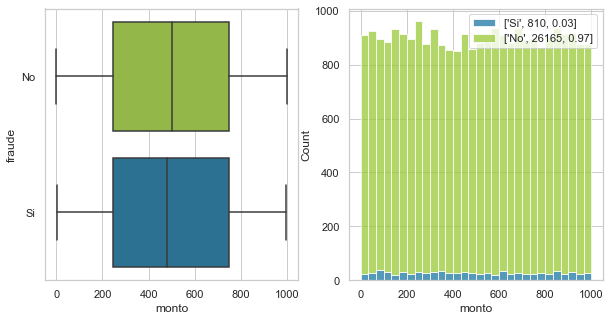

In [165]:
sns.set(style='whitegrid',rc={'figure.figsize':(10,5)})
fig, axs = plt.subplots(ncols=2)

b=sns.boxplot(data=df,x='monto',y='fraude',
           palette=sns.blend_palette(colores, 2), ax=axs[0])

a=sns.histplot(df,x='monto',hue='fraude',multiple='stack',
             palette=sns.blend_palette(colores, 2), ax=axs[1])

plt.legend(labels=[['Si',df['fraude'].value_counts()[1],
                    round(df['fraude'].value_counts(normalize=True)[1],2)],
           ['No',df['fraude'].value_counts()[0],
                   round(df['fraude'].value_counts(normalize=True)[0],2)]],
           loc='upper right' )

plt.show()

In [167]:
df['genero'].value_counts(normalize=True)

M              0.501168
F              0.397627
no definido    0.101205
Name: genero, dtype: float64

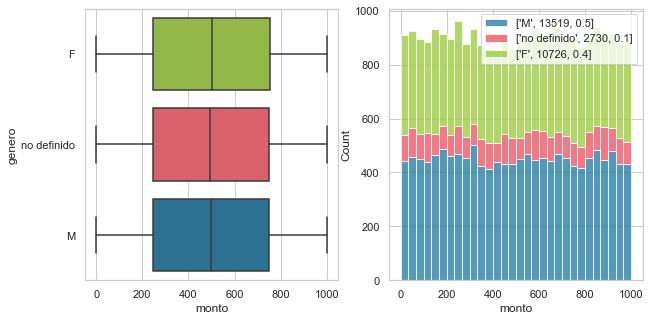

In [197]:
sns.set(style='whitegrid',rc={'figure.figsize':(10,5)})
fig, axs = plt.subplots(ncols=2)

a=sns.boxplot(data=df,x='monto',y='genero',
           palette=sns.blend_palette(colores, 3), ax=axs[0])

b=sns.histplot(df,x='monto',hue='genero',multiple='stack',
             palette=sns.blend_palette(colores, 3), ax=axs[1])#,legend=False)

plt.legend(labels=[['M',df['genero'].value_counts()[0],
                    round(df['genero'].value_counts(normalize=True)[0],2)],
                   ['no definido',df['genero'].value_counts()[2],
                    round(df['genero'].value_counts(normalize=True)[2],2)],
                    ['F',df['genero'].value_counts()[1],
                    round(df['genero'].value_counts(normalize=True)[1],2)]],
           loc='upper right' )

plt.show()

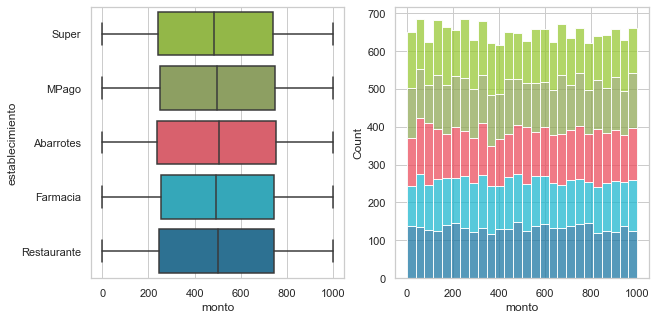

In [180]:
sns.set(style='whitegrid',rc={'figure.figsize':(10,5)})
fig, axs = plt.subplots(ncols=2)

a=sns.boxplot(data=df,x='monto',y='establecimiento',
           palette=sns.blend_palette(colores, 5), ax=axs[0])

b=sns.histplot(df,x='monto',hue='establecimiento',multiple='stack',
             palette=sns.blend_palette(colores, 5), ax=axs[1],legend=False)

plt.show()

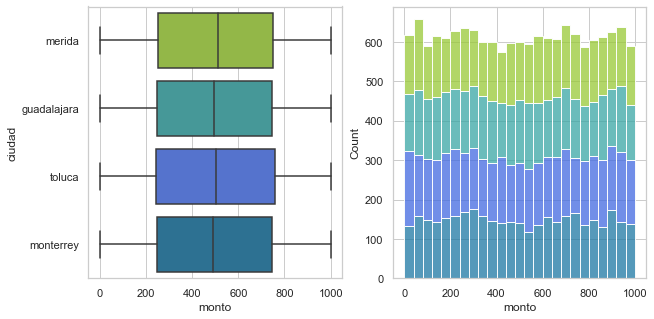

In [120]:
sns.set(style='whitegrid',rc={'figure.figsize':(10,5)})
fig, axs = plt.subplots(ncols=2)

a=sns.boxplot(data=df,x='monto',y='ciudad',
           palette=sns.blend_palette(colores, 4), ax=axs[0])

b=sns.histplot(df,x='monto',hue='ciudad',multiple='stack',
             palette=sns.blend_palette(colores, 4), ax=axs[1],legend=False)

plt.show()

In [18]:
df.isna().sum()

id_user                0
genero                 0
monto                  0
fecha                  0
hora                   0
dispositivo            0
establecimiento    10119
ciudad             11678
tipo_tc                0
linea_tc               0
interes_tc             0
status_txn             0
is_prime               0
dcto                   0
cashback               0
fraude                 0
dtype: int64